<a href="https://colab.research.google.com/github/Sam-Arkle/IntroSystems/blob/master/topics_machine_learning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0, 0.5, 't')

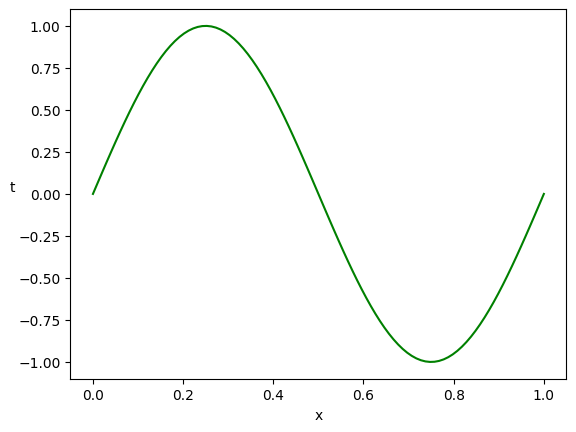

In [225]:
import matplotlib.pyplot as plt
import numpy as np
import random

#Creating the sin 2 pi x graph
large = 100
x_smooth = np.linspace(0,1,large)
np.random.seed(2)

y = np.sin(2 * np.pi * x_smooth)

plt.plot(x_smooth, y, color='green')
plt.xlabel('x')
plt.ylabel('t', rotation=0)


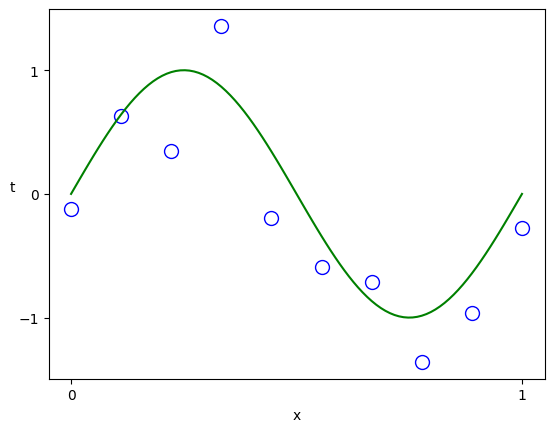

In [226]:
#Generating fig 1.2
# Training data
N = 10
x_train = np.linspace(0,1,N)
# ts = np.sin(2 * np.pi * xt + random.uniform(-0.4, 0.4))
t_train = np.sin(2 * np.pi * x_train)
random_gaussian_values = np.random.normal(loc=0, scale=0.3, size=t_train.shape)
t_train = t_train + random_gaussian_values
plt.scatter(x_train, t_train, color='white', edgecolor='blue', s=100)
plt.plot(x_smooth, y, color='green')
plt.xlabel('x')
plt.ylabel('t', rotation=0)
plt.xticks([0,1])  # No intervals on the x-axis
plt.yticks([-1,0,1])  # No intervals on the y-axis
plt.show()

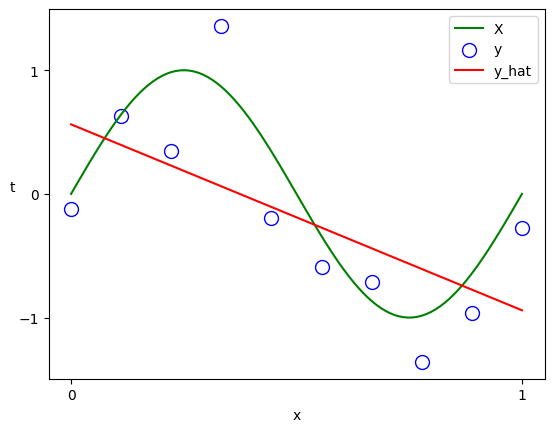

In [227]:
# Work for Friday
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#Generating just the graph for M = 1

M = 1 # This will effect the degree of the line/curve of fit
#For sklearn pipe we must reshape our vectors into matrices
x_train = x_train.reshape((-1, 1))
x_smooth = x_smooth.reshape((-1, 1))
t_train = t_train.reshape((-1,1))

def plot_for_M(M):
  pipe = make_pipeline(PolynomialFeatures(degree=M), LinearRegression())
  pipe.fit(x_train, t_train)
  y_hat = pipe.predict(x_smooth)

  plt.plot(x_smooth, y, color='green', label='X')
  plt.xlabel('x')
  plt.ylabel('t', rotation=0)
  plt.scatter(x_train, t_train, color='white', edgecolor='blue', s=100, label='y')
  plt.plot(x_smooth, y_hat, marker='none', color='red', label='y_hat')
  plt.xticks([0,1])
  plt.yticks([-1,0,1])
  # plt.ylim((-1.5, 1.5))
  plt.legend()
  plt.show()

plot_for_M(M)




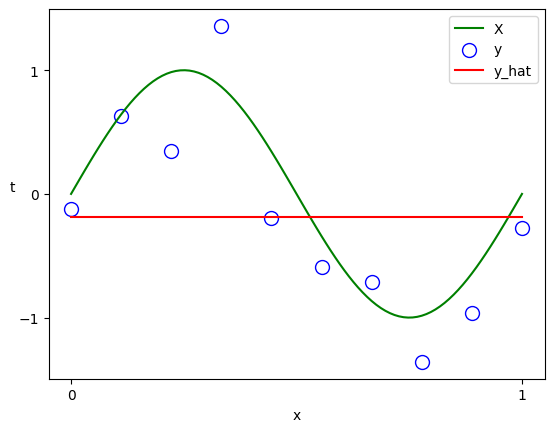

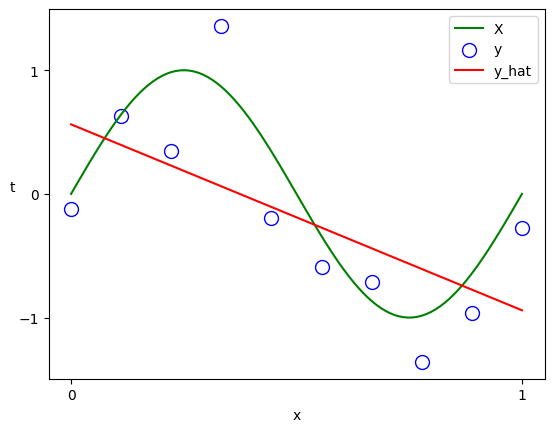

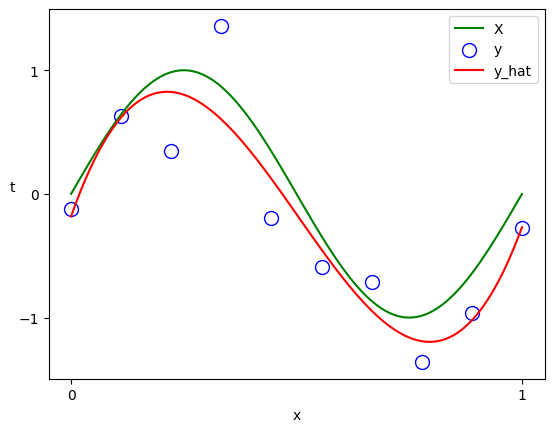

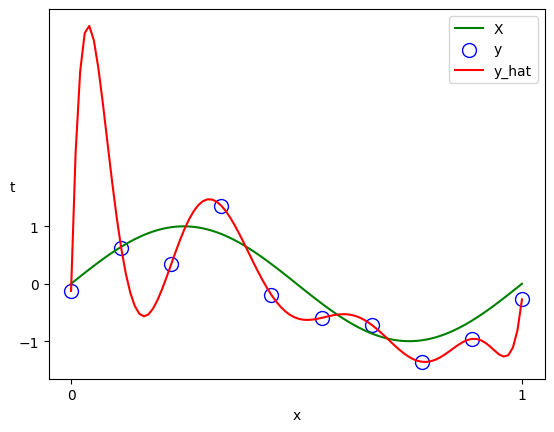

In [228]:
#altering the M values to produce polynomials of different orders M

M = 0

M_values = [0,1,3,9]

for value in M_values:
  plot_for_M(value)



In [229]:
# Now we want to be able to seperate a training set of data and a test set of data
# Our training data was on 10 points, our test data will have 100 points
x_test = np.linspace(0,1,10000)
t_test = np.sin(2 * np.pi * x_test)
random_gaussian_values = np.random.normal(loc=0, scale=0.3, size=t_test.shape)
t_test = t_test + random_gaussian_values
x_test = x_test.reshape((-1,1))
t_test = t_test.reshape((-1,1))


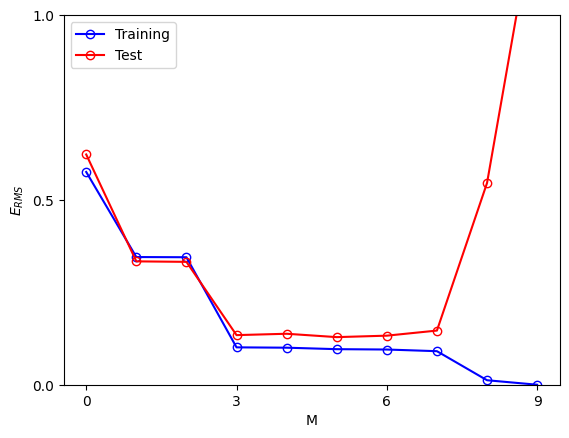

In [230]:
# Now we want to determine the root mean squared error against the training and test set of data
from sklearn.metrics import  mean_squared_error as rms

#rms requires that we test against the same number of data points in each instance. So we need the actual y values for our x test set
# y_test = y
# y_train = np.sin(2 * np.pi * x_train)
# y_train = y_train.reshape((-1,1))


# Now we need to see the RMS for the different values of M on test and train data to generate the graph
rms_train = []
rms_test = []


def generate_guess(x_train, x_test, t_train, M):
  pipe = make_pipeline(PolynomialFeatures(degree=M), LinearRegression())
  pipe.fit(x_train, t_train)
  y_hat_train = pipe.predict(x_train)
  y_hat_test = pipe.predict(x_test)
  return y_hat_train, y_hat_test

M_value = np.arange(0,10)

for value in M_value:
  train_guess, test_guess = generate_guess(x_train, x_test, t_train, value)
  rms_train.append(rms(t_train, train_guess))
  rms_test.append(rms(t_test, test_guess))


plt.plot(M_value,rms_train, marker='o',  markerfacecolor='none', color='blue', label='Training')
plt.plot(M_value,rms_test, marker='o',  markerfacecolor='none', color='red', label='Test')
plt.xlabel('M')
plt.ylabel(r'$E_{RMS}$')
plt.ylim(0,1)
plt.yticks([0,0.5,1.0])
plt.xticks([0,3,6,9])
plt.legend()
plt.show()
